In [ ]:
# Final Project - Digital Forensics
# Created By: Ryan Joseph
# Date: 12/09/2023
# Description: This file is used to predict the class of a given image. It uses the model that was trained in detector.ipynb

In [320]:
# Necessary Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from PIL import Image
import numpy as np
from keras.applications.densenet import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [321]:
# Replace 'image_path' with the path to your image

# images I made myself and created on Midjourney
#image_path = 'my_images/test_3.jpg'
#image_path = 'my_images/midjourney_1.png'

#image_path = 'resnet/test/FAKE/fake_4.jpg'
#image_path = 'resnet/test/REAL/real_4.jpg'

image_path = 'my_images/boat.png'

In [323]:
# load trained model
new_model = tf.keras.models.load_model('weights/resnet.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
 7 (GlobalAveragePooling2D)                                      
                                                                 
 dense_39 (Dense)            (None, 256)               262400    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 1)                 257       
                                                                 
Total params: 7300161 (27.85 MB)
Trainable params: 262657 (1.00 MB)
Non-trainable params: 7037504 (26.85 MB)
__________

In [324]:
# Load the model weights
new_model = load_model('weights/resnet.h5')

# Function to preprocess the testing images
def preprocess_image(image_path):
    # Load and resize the image
    img = Image.open(image_path)
    #img = img.resize((32, 32))
    img = img.resize((224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict with the model
prediction = new_model.predict(processed_image)

# Show the prediction to make sure it looks right
print(prediction)

1/1 [==============================] - 1s 1s/step
[[4.4907687e-05]]


In [325]:
# Binary
# 0-0.5= FAKE
# 0.5-1= REAL

Prediction: [[4.4907687e-05]]

FAKE Image...


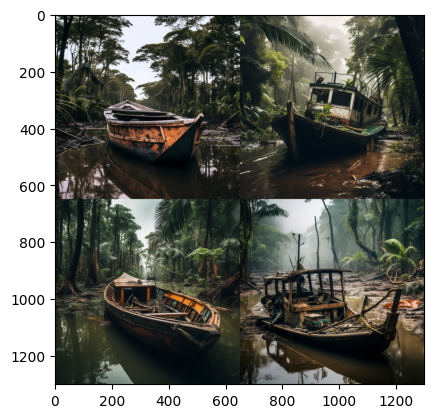

In [326]:
# Function to display the image and model's prediction of image
def predict_img(prediction, image_path=image_path):
    # display image
    img = Image.open(image_path)
    plt.imshow(img)
    print(f"Prediction: {prediction}")
    y_pred_binary = np.where(prediction >= 0.5, 1, 0)
    if y_pred_binary == 0:
        print('\nFAKE Image...')
    else:
        print('\nREAL Image...')

# Call the function to display the image and model's prediction of image
predict_img(prediction) 